# ① Background
돈이 몰리는 곳에 수익 기회가 있다.  
매수하기 직전 거래대금이 손익에 영향을 미칠까?  
유튜브: https://youtu.be/oVhoONMWV8I

# ② Methods

### Import

In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Load

In [84]:
df = pd.read_csv('data.csv')
df['매수시간'] = pd.to_datetime(df['매수시간'])
df.head()

,주문일자,종목명,매수가격,매수시간,매도시간,수익률,매매횟수,종목코드,뉴스기사,최대거래대금 시간,최대거래대금,매수등락률,시가등락률,양봉개수
0,2022-03-29,고려시멘트,5230,2022-04-26 09:09:07,09:21:27,2.87,1,198440.0,1,09:06:00,113,16.22,6.22,1
1,2022-03-29,고려시멘트,5410,2022-04-26 09:28:09,09:32:19,1.85,2,198440.0,1,09:06:00,113,20.22,6.22,2
2,2022-03-29,영진약품,5490,2022-04-26 09:51:11,09:55:24,0.66,3,3520.0,1,09:50:00,62,6.60,0.19,1
3,2022-03-29,버킷스튜디오,5060,2022-04-26 09:58:16,09:59:56,-0.59,4,66410.0,1,09:22:00,72,11.58,3.09,0
4,2022-03-29,우리바이오,4390,2022-04-26 10:00:40,10:00:50,-0.57,5,82850.0,1,10:00:00,44,10.86,4.17,3


### 1분차트 데이터

In [85]:
frame = pd.read_csv('minute/2022-03-29_고려시멘트.csv')
frame['시간'] = pd.to_datetime(frame['시간'])
frame.head()

,날짜,시간,시가,고가,저가,종가,종가 단순 5,10,20,60,120,거래량,단순 5,20.1,60.1,120.1
0,2022-03-29,2022-04-26 15:35:00,5090,5090,5090,5090,5082,5068.0,5043.75,5011.667,5058.750,37134,188670.4,104647.50,87611.38,82089.93
1,2022-03-29,2022-04-26 15:30:00,5090,5090,5090,5090,5076,5064.0,5038.75,5011.833,5059.000,407799,198766.0,105884.00,88337.77,85438.00
2,2022-03-29,2022-04-26 15:19:00,5080,5090,5070,5090,5070,5059.0,5033.75,5011.667,5060.083,182428,128182.0,87319.05,83187.48,82428.02
3,2022-03-29,2022-04-26 15:18:00,5070,5090,5060,5080,5060,5053.0,5028.75,5011.500,5061.083,161683,107055.4,79688.35,80869.27,81484.14
4,2022-03-29,2022-04-26 15:17:00,5060,5080,5060,5060,5054,5048.0,5024.00,5011.667,5062.167,154308,98743.2,76215.75,78556.47,81216.53


### 거래대금 = 종가 * 거래량

In [86]:
frame['거래대금'] = round((frame['종가'] * frame['거래량']) / 100000000)
frame['거래대금'] = frame['거래대금'].astype(int)
frame.head()

,날짜,시간,시가,고가,저가,종가,종가 단순 5,10,20,60,120,거래량,단순 5,20.1,60.1,120.1,거래대금
0,2022-03-29,2022-04-26 15:35:00,5090,5090,5090,5090,5082,5068.0,5043.75,5011.667,5058.750,37134,188670.4,104647.50,87611.38,82089.93,2
1,2022-03-29,2022-04-26 15:30:00,5090,5090,5090,5090,5076,5064.0,5038.75,5011.833,5059.000,407799,198766.0,105884.00,88337.77,85438.00,21
2,2022-03-29,2022-04-26 15:19:00,5080,5090,5070,5090,5070,5059.0,5033.75,5011.667,5060.083,182428,128182.0,87319.05,83187.48,82428.02,9
3,2022-03-29,2022-04-26 15:18:00,5070,5090,5060,5080,5060,5053.0,5028.75,5011.500,5061.083,161683,107055.4,79688.35,80869.27,81484.14,8
4,2022-03-29,2022-04-26 15:17:00,5060,5080,5060,5060,5054,5048.0,5024.00,5011.667,5062.167,154308,98743.2,76215.75,78556.47,81216.53,8


### 매수 직전의 캔들만 필터링하기

In [49]:
frame = frame[frame['시간'] < df['매수시간'].iloc[0]]
frame = frame.reset_index(drop=True)
frame.head()

,날짜,시간,시가,고가,저가,종가,종가 단순 5,10,20,60,120,거래량,단순 5,20.1,60.1,120.1,거래대금
0,2022-03-29,2022-04-26 09:09:00,5230,5250,5210,5250,5159,5010.5,4766.50,4615.167,4596.958,428311,1322855.0,518549.2,176438.2,89849.80,22.0
1,2022-03-29,2022-04-26 09:08:00,5150,5250,5150,5230,5093,4935.5,4730.75,4603.750,4591.458,1205130,1380594.0,497345.3,169306.4,86284.07,63.0
2,2022-03-29,2022-04-26 09:07:00,5170,5250,5150,5160,5026,4862.5,4695.75,4592.667,4586.083,1622205,1288157.0,437452.4,149252.6,76249.43,84.0
3,2022-03-29,2022-04-26 09:06:00,4995,5200,4985,5160,4966,4798.0,4664.25,4582.750,4581.333,2191679,1067113.0,356626.2,122218.4,62745.13,113.0
4,2022-03-29,2022-04-26 09:05:00,4915,4995,4910,4995,4892,4734.0,4632.75,4572.833,4576.542,1166948,731800.6,247700.8,85920.5,44497.93,58.0


### 매수하기 직전 거래대금 추출하기

In [50]:
frame['거래대금'].iloc[1]

63.0

# ③ '직전 거래대금' 칼럼을 추가한 최종적인 데이터프레임 만들기

In [87]:
list = []

df = pd.read_csv('data.csv')
df['매수시간'] = pd.to_datetime(df['매수시간'])
df['수익률'] = df['수익률'].apply(lambda x : x - 0.3)

for i in range(len(df)):

    date = df.iloc[i]['주문일자']
    firm = df.iloc[i]['종목명']
    time = df.iloc[i]['매수시간']

    frame = pd.read_csv('minute/'+date+'_'+firm+'.csv')
    frame['시간'] = pd.to_datetime(frame['시간'])

    frame['거래대금'] = round((frame['종가'] * frame['거래량']) / 100000000)
    frame['거래대금'] = frame['거래대금'].astype(int)

    frame = frame[frame['시간'] < time]
    frame = frame.reset_index(drop=True)

    money = frame['거래대금'].iloc[1]
    
    list.append(money)
    
df['직전 거래대금'] = list

In [88]:
df.head()

,주문일자,종목명,매수가격,매수시간,매도시간,수익률,매매횟수,종목코드,뉴스기사,최대거래대금 시간,최대거래대금,매수등락률,시가등락률,양봉개수,직전 거래대금
0,2022-03-29,고려시멘트,5230,2022-04-26 09:09:07,09:21:27,2.57,1,198440.0,1,09:06:00,113,16.22,6.22,1,63
1,2022-03-29,고려시멘트,5410,2022-04-26 09:28:09,09:32:19,1.55,2,198440.0,1,09:06:00,113,20.22,6.22,2,16
2,2022-03-29,영진약품,5490,2022-04-26 09:51:11,09:55:24,0.36,3,3520.0,1,09:50:00,62,6.60,0.19,1,62
3,2022-03-29,버킷스튜디오,5060,2022-04-26 09:58:16,09:59:56,-0.89,4,66410.0,1,09:22:00,72,11.58,3.09,0,26
4,2022-03-29,우리바이오,4390,2022-04-26 10:00:40,10:00:50,-0.87,5,82850.0,1,10:00:00,44,10.86,4.17,3,43


# ④ Visualization

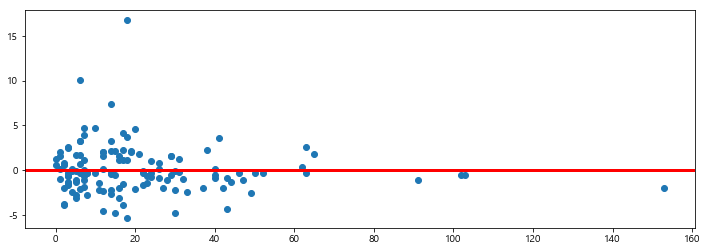

In [94]:
plt.scatter(df['직전 거래대금'], df['수익률'])
plt.axhline(y=0, color='r', linewidth=3)
plt.rcParams["figure.figsize"] = (12, 4)
plt.show()

# ⑤ 직전 거래대금과 수익률의 관계

In [90]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

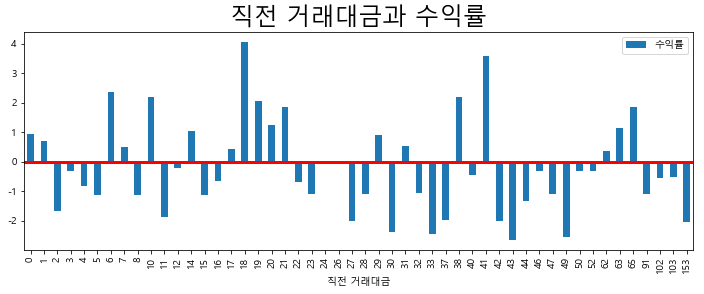

In [93]:
df.groupby('직전 거래대금')['수익률'].mean().plot.bar(legend=True)
plt.axhline(y=0, color='r', linewidth=3)
plt.title('직전 거래대금과 수익률', size=24)
plt.show()

# ⑥ Results
수익 구간: 17~21억원    
손실 구간: 22억원~

# ⑦ Conclusion
직전 거래대금이 17억~21억원이라면 적극 진입한다.